# UTS Pembelajaran Mesin

Nim, Nama, Kelas : 1197050059 Khoirul Ummam C

# Topik Mini Riset

Mini Riset ini mencoba untuk memprediksi jumlah kemenangan pada setiap tim bola basket menggunakan **Linear Regression**.

# Business Understanding 

Dalam mini riset ini, saya akan mencoba memprediksi jumlah kemanangan untuk setiap tim bola basket dari dataset bola basket perguruan tinggi menggunakan "Empat Faktor Keberhasilan Bola Basket" menurut Dean Oliver (seorang analisis bola basket terkemuka di Amerika Serikat). Apa yang dimaksud dengan empat faktor? Empat faktor adalah empat strategi terpenting untuk memenangkan permainan bola basket yang berkaitan dengan Score, Protect, Crash, and Attack seperti yang di analisis oleh Dean Oliver. Strateginya adalah :

1. Skor setiap kepemilikan
2. Dapat mengambil semua bola Rebound
3. Sampai ke garis Pertahanan musuh
4. Melindungi bola basket dari musuh

Dari strategi tersebut dapat dipresentasikan dalam empat statistik:

1. Sasaran lapangan yang efektif
2. Turnover percentage (kesalahan seorang pemain/tim yang menyebabkan bola beralih ke tangan lawan)
3. Persentase Rebound
4. Tingkat lemparan bebas

Perlu diperhatikan untuk setiap tim bahwa harus selalu mempertimbangkan baik dalam penyerangan maupun pertahanan, seperti misalnya hanya dengan mencetak banyak poin tidaklah cukup untuk memenangkan permainan, maka dari itu diperlukan dari setiap tim nya harus dapat meminimalkan skor lawan. jadi, kita harus mempertimbangkan total 8 faktor untuk menyerang dan bertahan:

**FAKTOR-FAKTOR SERANGAN**
1. Persentase Sasaran Lapangan yang efektif
2. Persentase Turnover
3. Persentase Rebound (bola muntah) ketika melakukan penyerangan
4. Tingkat presentase lemparan bebas

**FAKTOR-FAKTOR PERTAHANAN**
1. Persentase sasaran lapangan efektif lawan
2. Opponent's turnover percentage
3. Persentase Rebound (bola muntah) ketika melakukan pertahanan
4. Tingkat lemparan bebas dari lawan



# Data Understanding


**8 faktor kami adalah :**

1. EFG_O : Effective Field Goal Percentage Shoot 
2. EFG_D : Effective Field Goal Percentage Allowed
3. TOR : Turnover Percentage Allowed (Turnover Rate)
4. TORD : Turnover Percentage Committed(Steal Rate)
5. ORB : Offensive Rebound Percentage
6. DRB : Deffensive Rebound Percentage
7. FTR : Free Throw Rate (Seberapa sering tim yang diberikan menembakkan Lemparan Bebas)
8. FTRD : Free Throw Rate Allowed

Dari 8 faktor di atas 'EFG_O' memiliki korelasi tertinggi dengan jumlah kemenangan, serta 'EFG_D' memiliki korelasi negatif terendah.

**Mengenai 3 fitur teratas yang berkorelasi sebenarnya adalah :**
1. WAB : Wins Above Bubble (Prediksi jumlah kemenangan melawan rata-rata tim NCAA)
2. BARTHAG : Power Rating (Peringkat Kekuatan)
3. ADJOE : Adjusted Offensive Efficiency (efisiensi ofensif yang disesuaikan)

**DEAN OLIVER** juga mengidentifikasi perkiraan bobot untuk setiap faktor:
1. Menembak (40%)
2. Turnover (25%)
3. Rebound (20%)
4. Lemparan bebas (15%)

Dengan kesimpulan bahwasannya Menembak adalah faktor terpenting, diikuti oleh tunover, rebound dan lemaparan bebas. Dari nilai korelasi kita dapat melihat bahwa urutan ini sudah tepat, tetapi bobotnya berbeda sedikit dengan model kita.

---
---
---

Disini juga saya menemukan suatu data dimana Defensive Rebound dan Free Throw Defensive memberikan hubungan yang lebih linier daripada rekan-rekan ofensif. Namun, jumlah turnover yang dilakukan memberikan hubungan linier yang lemah dibandingkan dengan linearitas tinggi ketika kita mengukur turnover yang diizinkan.

### 

Kemudian pada bagian analisis model dengan mengevaluasi parameter, skor R^2 yang saya peroleh sekitar 86% yang sudah cukup bagus, tapi tidak terlalu bagus juga. Karena dari koefisiennya kita akan melihat bahwa urutan faktor "paling penting" adalah benar. Tetapi disini kita akan melihat apakah bobotnya memenuhi aturan dari DEAN OLIVER yaitu 40/25/20/15? Maka dari itu kita akan mencari tahu terlebih dahulu rata-rata nilai koefisien absolut dari kedua lawan offensive dan defensive misalnya (rata-rata koefisien absolut EFG_O dan EFG_D adalah (0,951573+0,890253)/2=0,92091), kemudian dibagi dengan jumlah total koefisien absolut rata-rata.

Dari hasil yang saya dapatkan adalah:
1. Menembak (40,2%)
2. Turnover (38,3%)
3. Rebound (15,7%)
4. Lemparan Bebas (5,7%)

Dapat kita simpulkan kembali bahwa Menembak masih memberikan bobot yang sama atau yang paling tertinggi dari hasil bobot yang lainnya. Namun Turnover menghasilkan bobot yang begitu tinggi juga dari analisa Dean Oliver, sekaligus menurunkan bobot dari Rebound dan Lemparan Bebas (Free Throw). 

Hal ini bisa jadi dikarenakan perbedaan berat badan dapat mempengaruhi gaya bermain bola basket di perguruan tinggi. Tapi bisa jadi juga bobot ini bisa meningkat lagi dikarenakan dengan adanya Three Points atau lemparan tiga angka ini.

# Data Preparation


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input/college-basketball-dataset/cbb.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [53]:
# Memuat dan membaca data

df = pd.read_csv("cbb.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1757 non-null   object 
 1   CONF        1757 non-null   object 
 2   G           1757 non-null   int64  
 3   W           1757 non-null   int64  
 4   ADJOE       1757 non-null   float64
 5   ADJDE       1757 non-null   float64
 6   BARTHAG     1757 non-null   float64
 7   EFG_O       1757 non-null   float64
 8   EFG_D       1757 non-null   float64
 9   TOR         1757 non-null   float64
 10  TORD        1757 non-null   float64
 11  ORB         1757 non-null   float64
 12  DRB         1757 non-null   float64
 13  FTR         1757 non-null   float64
 14  FTRD        1757 non-null   float64
 15  2P_O        1757 non-null   float64
 16  2P_D        1757 non-null   float64
 17  3P_O        1757 non-null   float64
 18  3P_D        1757 non-null   float64
 19  ADJ_T       1757 non-null  

In [ ]:
df.corr()['W'].sort_values()[:-1]

ADJDE     -0.690753
SEED      -0.612284
EFG_D     -0.609144
2P_D      -0.529558
3P_D      -0.485485
TOR       -0.467073
DRB       -0.366715
FTRD      -0.329245
ADJ_T     -0.016057
YEAR       0.091829
FTR        0.126931
TORD       0.138805
ORB        0.296395
3P_O       0.432743
2P_O       0.585806
EFG_O      0.617839
G          0.708838
ADJOE      0.754532
BARTHAG    0.814512
WAB        0.905029
Name: W, dtype: float64

In [27]:
# Membuat subdataframe yang berisi delapan faktor dan target

df_ff = df[['EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','W']]

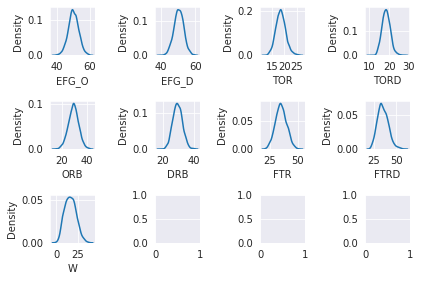

In [28]:
# Menampilkan distribusi masing-masing fitur

fig, axes = plt.subplots(ncols=4, nrows=3)
for col, ax in zip(df_ff.columns, axes.flat):
    sns.distplot(df_ff[col], hist=False, ax=ax)
plt.tight_layout()
plt.show()

In [29]:
# statistik deskriptif untuk semua fitur

df_ff.describe()

,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,W
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000
mean,50.120489,50.312806,18.591804,18.521286,29.277120,29.467445,35.097894,35.373307,16.513375
std,3.130430,2.859604,1.991637,2.108968,4.101782,3.061786,4.884599,5.900935,6.545571
min,39.400000,39.600000,12.400000,10.200000,15.000000,18.400000,21.600000,21.800000,0.000000
25%,48.100000,48.400000,17.200000,17.100000,26.600000,27.300000,31.700000,31.200000,12.000000
50%,50.000000,50.300000,18.500000,18.500000,29.400000,29.400000,34.900000,34.900000,16.000000
75%,52.100000,52.300000,19.800000,19.900000,31.900000,31.500000,38.300000,39.200000,21.000000
max,59.800000,59.500000,26.100000,28.000000,42.100000,40.400000,51.000000,58.500000,38.000000


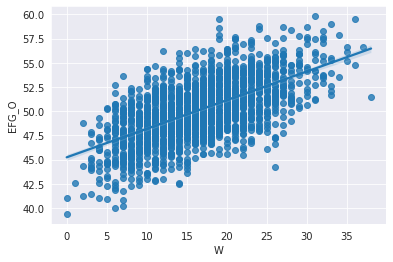

In [30]:
# scatterplot dengan jumlah kemenangan dari beberapa faktor

sns.regplot(x='W',y = 'EFG_O',data = df_ff,scatter= True, fit_reg=True)

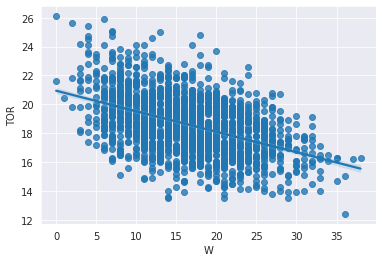

In [31]:
# persentase turnover (kesalahan player / sebuah tim yang menyebabkan bolah beralih ke tangan lawan)

sns.regplot(x='W',y = 'TOR',data = df_ff,scatter= True, fit_reg=True)

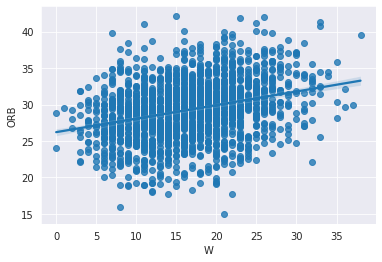

In [32]:
# Persentase Rebound Offensive

sns.regplot(x='W',y = 'ORB',data = df_ff,scatter= True, fit_reg=True)

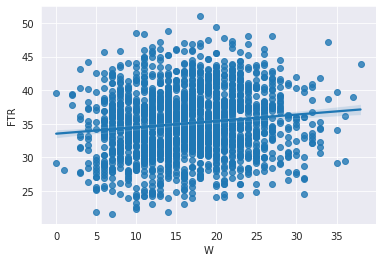

In [33]:
# Tingkat Lemparan bebas (Free Throw)

sns.regplot(x='W',y = 'FTR',data = df_ff,scatter= True, fit_reg=True)

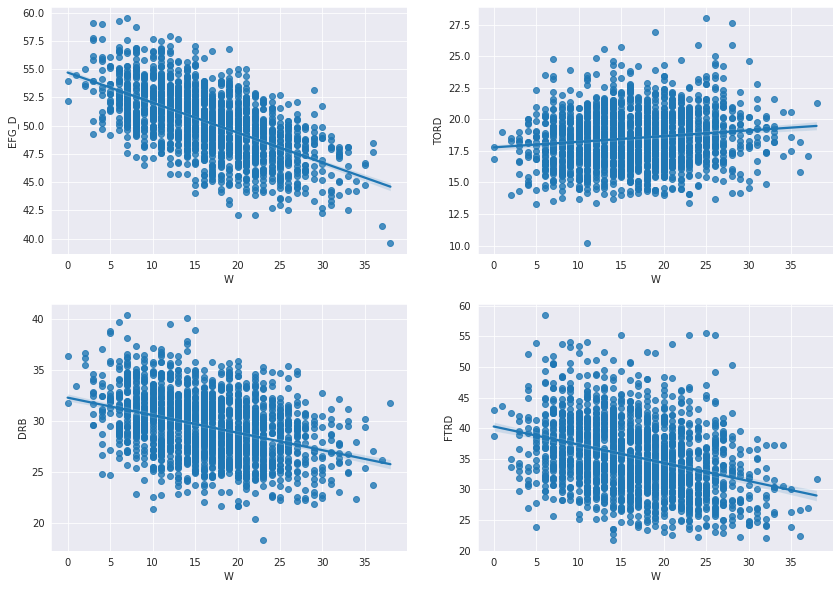

In [34]:
# plot dari faktor-faktor pertahanan

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
sns.regplot(x='W',y = 'EFG_D',data = df_ff,scatter= True, fit_reg=True,ax=ax1)
sns.regplot(x='W',y = 'TORD',data = df_ff,scatter= True, fit_reg=True,ax=ax2)
sns.regplot(x='W',y = 'DRB',data = df_ff,scatter= True, fit_reg=True,ax=ax3)
sns.regplot(x='W',y = 'FTRD',data = df_ff,scatter= True, fit_reg=True,ax=ax4)

# Modeling

Membahas mengenai proses Fiting Model, set parameter-parameter dll.

In [35]:
# persiapan dataset

df_ff = df[['EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD']]
df_ff_y = df['W']

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [39]:
# split the train, test data and create the model

X_train, X_test, y_train, y_test = train_test_split(df_ff, df_ff_y, test_size=0.25, random_state=21)
reg = LinearRegression()
reg = reg.fit(X_train,y_train)

# Evaluasi

Membahas mengenai hasil pengujian terhadap model.

In [40]:
# analisis model dengan mengevaluasi parameter

print('Intercept: ', reg.intercept_)
print('R^2 score: ',reg.score(X_train,y_train))

Intercept:  14.12939636435938
R^2 score:  0.8626030354780149


In [41]:
coeff_df = pd.DataFrame(reg.coef_, df_ff.columns, columns=['Coefficient'])
coeff_df

,Coefficient
EFG_O,0.951573
EFG_D,-0.890253
TOR,-0.841154
TORD,0.911814
ORB,0.372406
DRB,-0.347853
FTR,0.097183
FTRD,-0.163444


In [42]:
# mencari rata-rata nilai koefisien absolut dari kedua lawan offensive dan defensive

cof = []
tcof = 0
for i in range(0,8,2):
    avgcof = (abs(coeff_df['Coefficient'][i])+abs(coeff_df['Coefficient'][i+1]))/2
    cof.append(avgcof)
    tcof += avgcof
print(cof/tcof)

[0.40252509 0.3831055  0.15741033 0.05695907]


In [43]:
# predict from the test set

y_pred = reg.predict(X_test)

In [44]:
# analisis prediksi

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.9428052099145077
Mean Squared Error: 5.846166644860628
Root Mean Squared Error: 2.417884745983693


In [45]:
# 10 hasil paling akurat dari model yang telah dibuat

dfd = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'AbsDiff': abs(y_test-y_pred)})
dfd.sort_values(by=['AbsDiff'], inplace=True, ascending=True)
dfd[:10]

,Actual,Predicted,AbsDiff
21,27,26.994470,0.005530
1474,27,27.018789,0.018789
937,4,4.024492,0.024492
323,19,18.971766,0.028234
541,13,13.029225,0.029225
1092,10,9.967732,0.032268
1582,19,19.047888,0.047888
119,19,19.049589,0.049589
1200,16,16.052064,0.052064
689,17,17.059005,0.059005


In [48]:
# disini kita bisa melihat statistik kemenangan dari Texas Tech pada tahun 2018
# 27 kemenangan yang diraih oleh Texas Tech

df[df.index == 21]

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
21,Texas Tech,B12,37,27,112.7,91.5,0.917,52.0,46.4,17.8,...,38.0,51.1,45.1,35.9,32.3,67.6,4.7,E8,3.0,2018


In [49]:
# 4 kemenangan yang diraih oleh St. Francis NY pada tahun 2017

df[df.index == 937]

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
937,St. Francis NY,NEC,30,4,86.7,111.6,0.0519,41.0,52.7,17.4,...,46.9,40.1,52.2,28.2,36.0,68.5,-22.5,NaN,NaN,2017


In [50]:
# membuat prediksi terburuk

dfd.sort_values(by=['AbsDiff'], inplace=True, ascending=False)
dfd[:10]

,Actual,Predicted,AbsDiff
1174,9,2.667218,6.332782
201,17,23.302688,6.302688
1421,13,19.054055,6.054055
1477,28,22.013689,5.986311
332,22,16.154166,5.845834
1612,23,17.174177,5.825823
1338,0,-5.770449,5.770449
1723,29,23.242989,5.757011
649,7,12.733567,5.733567
732,27,21.408859,5.591141


In [51]:
df[df.index == 1174]

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
1174,Western Carolina,SC,30,9,89.2,103.6,0.1532,43.1,52.9,23.2,...,46.6,41.9,52.1,30.4,36.0,68.5,-15.2,NaN,NaN,2017


In [52]:
df[df.index == 1338]

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
1338,Grambling St.,SWAC,27,0,76.7,117.0,0.0077,39.4,52.2,26.1,...,38.7,38.4,54.3,28.3,32.1,65.5,-22.3,NaN,NaN,2015
